<a href="https://colab.research.google.com/github/flavianacif/DSWP/blob/master/RFB_RN_53.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow_addons as tfa

from tensorflow import keras

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # importing ploting libraries
import seaborn as sns # importing seaborn for statistical plots
from collections import Counter

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, recall_score # calculate accuracy measures and confusion matrix

from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


[**Python**] - Verificar a versão do Tensorflow
> Assegurar que está a utilizar a versão 2.x.

In [3]:
tf.__version__

'2.3.0'

[**Python**] - Definir o número de casas decimais

In [4]:
np.set_printoptions(precision= 3)

### 1. Carregar os dados

[**Python**] - Carregar os dados:

In [5]:
# Leitura do dataframe:
df = pd.read_csv('/total_9.csv')

In [17]:
df_total = df.copy()

In [18]:
df_total.head()



,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43,target,cnae_secao,l_ind_1_mv,l_ind_2_mv,l_mc_1_mv,md1_o,md2_o,md3_o,md4_o,md5_o,md7_o,md8_o,md9_o,md10_o,md12_o,mc1_o,mc3_o,mc4_o
0,0,86,i,0.090339,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.009247,0.001729,0.000138,0.004412,0.0,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.0976,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Q,0,0,0,1.000000,0.398255,0.407658,0.114456,0.308309,0.453559,0.384122,0.111722,0.249513,0.393614,1.000000,0.044187,1.000000
1,1,18,z,0.005996,0.019476,0.124770,0.000000,0.038168,0.0,0.029214,0.046445,0.000000,0.049919,0.0,0.149741,0.003186,0.007671,0.006943,0.003589,0.0,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.0856,0.0286,0.0,0.0,0.0,0.0,0.0,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.0000,0.4444,0.2222,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,C,0,0,0,0.397077,0.689104,0.844217,0.000000,1.000000,0.809609,0.908028,0.000000,1.000000,1.000000,0.807546,1.000000,1.000000
2,2,74,z,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.0,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0000,1.00,1.00,1.0000,1.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,M,0,0,0,0.000383,0.102683,0.377814,0.080514,0.216878,0.080427,0.362960,0.077037,0.172051,0.352255,0.003804,0.015874,0.062344
3,3,49,q,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.142568,0.000438,0.000000,0.000042,0.000115,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.7857,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,H,0,0,0,0.000577,0.513947,0.703152,0.000000,0.000000,0.402548,0.609998,0.000000,0.000000,1.000000,0.111085,0.013452,0.034155
4,4,47,i,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.004829,0.006355,0.000719,0.0,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,0,G,0,0,0,0.012644,0.143017,0.407120,0.039687,0.106904,0.168026,0.438292,0.292442,0.653124,0.421618,0.487878,1.000000,0.214273


In [19]:
df_total.set_index('id', inplace=True)

In [20]:
df_total.columns

Index(['cnae2', 'rf2', 'md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7', 'md8',
       'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4', 'ind01',
       'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08', 'ind09',
       'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16', 'ind17',
       'ind18', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24', 'ind25',
       'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32', 'ind33',
       'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40', 'ind41',
       'ind42', 'ind43', 'target', 'cnae_secao', 'l_ind_1_mv', 'l_ind_2_mv',
       'l_mc_1_mv', 'md1_o', 'md2_o', 'md3_o', 'md4_o', 'md5_o', 'md7_o',
       'md8_o', 'md9_o', 'md10_o', 'md12_o', 'mc1_o', 'mc3_o', 'mc4_o'],
      dtype='object')

Retirando algumas colunas para testar

In [21]:
df_total.drop(columns = ['cnae2','md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7', 'md8',
       'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4'], inplace = True)

In [22]:
df_total.columns

Index(['rf2', 'ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07',
       'ind08', 'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15',
       'ind16', 'ind17', 'ind18', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23',
       'ind24', 'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31',
       'ind32', 'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39',
       'ind40', 'ind41', 'ind42', 'ind43', 'target', 'cnae_secao',
       'l_ind_1_mv', 'l_ind_2_mv', 'l_mc_1_mv', 'md1_o', 'md2_o', 'md3_o',
       'md4_o', 'md5_o', 'md7_o', 'md8_o', 'md9_o', 'md10_o', 'md12_o',
       'mc1_o', 'mc3_o', 'mc4_o'],
      dtype='object')

GET DUMMIES

In [23]:
df_total = pd.get_dummies(df_total)

In [25]:
X_treino = df_total[df_total['target']!= 2]

In [36]:
df_y = df_X['target']
df_X = df_X.drop(columns= ['target'])

In [26]:
X_test = df_total[df_total['target']== 2].drop(columns= ['target'])

Tratando o Balanceamento da Amostra

In [30]:
qtd = Counter(X_treino['target'])
qtd

Counter({0: 8513, 1: 2520})

In [31]:
np.round(100*qtd[1]/qtd[0], 4)

29.6018

In [45]:
from imblearn.under_sampling import RandomUnderSampler

In [218]:
over = SMOTE(sampling_strategy = 0.5) # Reamostrar a classe minoritária para ter 10% da classe majoritária
under = RandomUnderSampler(sampling_strategy = 0.85) # Seleciona a classe majoritária para ter 50%

Usando um Pileline

In [219]:
from imblearn.pipeline import Pipeline

In [220]:
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps = steps)

X_cc e y_cc são nossos dataframes originais.

In [221]:
# Aplica o pipeline
X, y = pipeline.fit_resample(df_X, df_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Antes:

In [222]:
Counter(df_y)

Counter({0: 8513, 1: 2520})

Depois:

In [223]:
qtd_d = Counter(y)
qtd_d

Counter({0: 5007, 1: 4256})

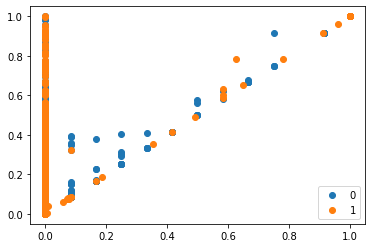

In [182]:
# scatter plot
for label, _ in qtd_d.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [183]:
# Instancia o modelo
lr = LogisticRegression()

# acrescenta o modelo ao pipeline:
steps = [('over', over), ('under', under), ('model', lr)]
pipeline = Pipeline(steps = steps)

NameError: ignored

In [184]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 20111974)
scores = cross_val_score(pipeline, X, y, scoring = 'roc_auc', cv = cv, n_jobs = -1)
scores

Avalia o Pipeline

In [ ]:
print(f'Mean ROC AUC: {np.mean(scores)}')

In [27]:
X_treino[X_treino['target'] ==1]

,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,...,md3_o,md4_o,md5_o,md7_o,md8_o,md9_o,md10_o,md12_o,mc1_o,mc3_o,mc4_o,rf2_d,rf2_i,rf2_k,rf2_p,rf2_q,rf2_r,rf2_s,rf2_v,rf2_y,rf2_z,cnae_secao_0,cnae_secao_A,cnae_secao_B,cnae_secao_C,cnae_secao_D,cnae_secao_E,cnae_secao_F,cnae_secao_G,cnae_secao_H,cnae_secao_I,cnae_secao_J,cnae_secao_K,cnae_secao_L,cnae_secao_M,cnae_secao_N,cnae_secao_P,cnae_secao_Q,cnae_secao_R,cnae_secao_S
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0281,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,1.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0976,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.407658,0.114456,0.308309,0.453559,0.384122,0.111722,0.249513,0.393614,1.000000,0.044187,1.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0.0,0.0000,0.0000,0.0,0.6797,0.0000,0.9799,0.9799,0.0,0.0,0.0,0.2782,0.7918,0.0000,0.0,0.0,0.0,0.0,1.0,0.0,0.1667,0.0833,0.0000,0.0000,0.1724,0.0556,0.7778,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.859439,0.427244,0.000000,0.686248,0.651201,0.210442,0.000000,1.000000,1.000000,0.250896,0.458526,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,0.0,0.1039,0.0767,1.0,1.0000,1.0000,0.6667,0.6667,0.0,0.0,0.0,0.0000,0.0000,1.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.378730,0.000000,0.292702,0.102914,0.390619,0.000000,0.290094,0.467330,0.002238,0.000000,0.294510,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,0.0,0.0155,1.0000,0.0,0.0000,1.0000,1.0000,1.0000,0.0,0.0,0.0,1.0000,0.5864,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.351667,0.010977,0.000000,0.035988,0.341619,0.015688,0.000000,0.352940,0.101693,0.005993,0.022430,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
14,0.0,0.0000,0.0767,1.0,1.0000,0.0000,0.0000,0.9078,0.0,0.0,0.0,0.4808,0.1522,0.0312,0.0,0.0,0.0,0.0,0.0,0.0,0.7500,1.0000,1.0000,1.0000,0.0000,0.4583,0.0417,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.412571,0.000000,0.000000,0.117286,0.401142,0.000000,0.000000,0.543254,0.253283,1.000000,0.111229,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12015,0.0,0.0000,0.0000,0.0,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,1.0000,0.8307,0.0012,0.0,0.0,0.0,0.0,0.0,1.0,0.2500,0.2500,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.376896,0.078306,0.000000,0.098453,0.387353,0.115404,0.000000,0.360046,0.498402,0.545100,0.314735,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
12017,0.0,0.1662,0.0000,0.0,0.0000,0.0000,0.9203,0.9203,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.1818,0.0555,0.5555,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.416788,0.000000,0.000000,0.111527,0.396925,0.193980,0.433224,0.467257,1.000000,1.000000,1.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
12024,0.0,0.0000,0.0000,0.0,0.0000,0.1671,0.0000,0.9798,0.0,0.0,0.0,0.1878,0.1231,0.0000,0.0,0.0,0.0,0.0,1.0,1.0,1.0000,1.0000,0.1667,0.1667,0.0833,0.4444,0.2500,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,0.942686,0.897884,1.000000,1.000000,0.785200,0.742602,0.545257,1.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
df_X.head()

,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,...,md3_o,md4_o,md5_o,md7_o,md8_o,md9_o,md10_o,md12_o,mc1_o,mc3_o,mc4_o,rf2_d,rf2_i,rf2_k,rf2_p,rf2_q,rf2_r,rf2_s,rf2_v,rf2_y,rf2_z,cnae_secao_0,cnae_secao_A,cnae_secao_B,cnae_secao_C,cnae_secao_D,cnae_secao_E,cnae_secao_F,cnae_secao_G,cnae_secao_H,cnae_secao_I,cnae_secao_J,cnae_secao_K,cnae_secao_L,cnae_secao_M,cnae_secao_N,cnae_secao_P,cnae_secao_Q,cnae_secao_R,cnae_secao_S
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.0976,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.407658,0.114456,0.308309,0.453559,0.384122,0.111722,0.249513,0.393614,1.000000,0.044187,1.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.0,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.0856,0.0286,0.0,0.0,0.0,0.0,0.0,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.0000,0.4444,0.2222,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.844217,0.000000,1.000000,0.809609,0.908028,0.000000,1.000000,1.000000,0.807546,1.000000,1.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0000,1.00,1.00,1.0000,1.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.377814,0.080514,0.216878,0.080427,0.362960,0.077037,0.172051,0.352255,0.003804,0.015874,0.062344,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.7857,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.703152,0.000000,0.000000,0.402548,0.609998,0.000000,0.000000,1.000000,0.111085,0.013452,0.034155,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.407120,0.039687,0.106904,0.168026,0.438292,0.292442,0.653124,0.421618,0.487878,1.000000,0.214273,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


[**Python**] - Mostrar as primeiras 5 linhas:

In [ ]:
X_test.head()

,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,...,md3_o,md4_o,md5_o,md7_o,md8_o,md9_o,md10_o,md12_o,mc1_o,mc3_o,mc4_o,rf2_d,rf2_i,rf2_k,rf2_p,rf2_q,rf2_r,rf2_s,rf2_v,rf2_y,rf2_z,cnae_secao_0,cnae_secao_A,cnae_secao_B,cnae_secao_C,cnae_secao_D,cnae_secao_E,cnae_secao_F,cnae_secao_G,cnae_secao_H,cnae_secao_I,cnae_secao_J,cnae_secao_K,cnae_secao_L,cnae_secao_M,cnae_secao_N,cnae_secao_P,cnae_secao_Q,cnae_secao_R,cnae_secao_S
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3411,0.0,0.0326,0.0,1.0,1.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.75,0.75,1.0,1.0,0.0625,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.429237,0.110482,0.297611,0.150525,0.425478,0.243343,0.623462,0.424363,0.044560,4.620425e-07,0.273459,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2177,0.0,0.0135,0.0,0.0,0.0,1.0,1.0000,1.0000,0.0,0.0,0.0,0.0293,0.5883,0.1016,0.0,0.0,0.0,0.0,0.0000,0.0000,1.00,0.00,0.0,0.0,0.0000,1.0000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.430270,0.040200,0.000000,0.170702,0.403804,0.041478,0.000000,0.535900,1.000000,2.673173e-03,0.435962,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8400,0.0,0.0438,0.0,1.0,1.0,1.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,1.0000,1.0000,0.00,0.00,1.0,1.0,0.0000,1.0000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.368574,0.000000,0.000000,0.078222,0.372541,0.000000,0.000000,0.429919,0.052227,2.394228e-02,0.196417,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
464,0.0,0.0000,0.0,0.0,0.0,0.0,0.4810,0.8654,0.0,0.0,0.0,0.3209,0.1926,0.0000,0.0,0.0,0.0,0.0,0.8694,0.9212,0.75,0.75,0.0,0.0,0.3091,0.1389,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,0.503878,1.000000,1.000000,1.000000,0.243786,1.000000,0.859042,3.538370e-01,0.926568,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6672,0.0,0.0153,0.0,0.0,0.0,0.0,0.7799,0.7799,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,1.0000,0.00,0.00,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.394364,0.101706,0.298525,0.125698,0.375346,0.094788,0.230897,0.374840,0.193310,0.000000e+00,0.115456,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### 3. Definir as amostras de treinamento e validação

[**Python**] - Definir as amostras de treinamento e validação

In [224]:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste= train_test_split(X, y, test_size = 0.1, random_state = 22091980) #20111974)
print(f'X: Treinamento=  {X_treinamento.shape}; X: Teste=  {X_teste.shape}')

X: Treinamento=  (8336, 88); X: Teste=  (927, 88)


In [225]:
print(f'Y: Treinamento =  {y_treinamento.shape}; Y: Teste = {y_teste.shape}')

Y: Treinamento =  (8336,); Y: Teste = (927,)


### 4. Definir a arquitetura da Rede Neural com _Tensorflow_/_Keras_

[**Python**] - Definir a arquitetura, ou seja:
* $N_{I}$: Número de neurônios na camada de entrada (_Input Layer_);
* $N_{O}$: Número de neurônios na camada de saída (_Output Layer_);
* $N_{H}$: Número de neurônios na camada escondida (_Hidden Layer_);
* FA: Função de ativação;

In [245]:
# Número de Neurônios na Input Layer:
N_I = 88

# Número de neurônios na Output Layer:
N_O = 1

# Número de neurônios na Hidden Layer:
N_H = 400

N_H2 = 200

N_H3=100

N_H4 = 50

N_H5 = 25

# Função de Ativação da Hidden Layer:
FA_H = tf.nn.leaky_relu
#FA_H = tf.keras.activations.swish

# Função de Ativação da Output Layer:
FA_O = tf.keras.activations.sigmoid




[**Python**] - Definir as sementes para NumPy e Tensorflow:
> Por questões de reproducibilidade de resultados, use as sementes abaixo:

* NumPy: 20111974;
* Tensorflow: 20111974;

In [246]:
np.random.seed(19800922)
tf.random.set_seed(22091980)


[**Python**] - Definir a Rede Neural:





* 1 camada _dropout_ com $p= 0.1$:

In [257]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

RN= Sequential()
RN.add(Dense(N_H, input_dim= N_I, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(N_H2, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(N_H3, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(N_H4, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(N_H5, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(units= N_O, activation= FA_O))

# Resumo da arquitetura da Rede Neural
print(RN.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 400)               35600     
_________________________________________________________________
dropout_45 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 200)               80200     
_________________________________________________________________
dropout_46 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_47 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 50)               

### 5. Compilar a Rede Neural

Este é um problema de classificação binária (_Male_ ou _Female_). Portanto, temos:
* optimizer= tf.keras.optimizers.Adam();
* loss=  tf.keras.losses.MeanSquaredError() ou loss= tf.keras.losses.BinaryCrossentropy(). Particularmente, eu gosto de usar loss=  tf.keras.losses.MeanSquaredError() porque o resultado é mais intuitivo;
* metrics= tf.keras.metrics.binary_accuracy.

[**Python**] - Comando modelo.compile(optimizer, loss, metrics):

In [258]:

Algoritmo_Opt = tf.keras.optimizers.Adamax()
#Algoritmo_Opt = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.8, beta_2=0.99, epsilon=1e-07 , amsgrad=True,     name='Adam')
Loss_Function = tf.keras.losses.MeanSquaredError()
#Metrics_Perf = tf.keras.metrics.binary_accuracy
#Metrics_Perf = 2 * (tf.keras.metrics.Recall() * tf.keras.metrics.Precision())/(tf.keras.metrics.Recall() + tf.keras.metrics.Precision())
#recall = tf.keras.metrics.Recall()
#prec = tf.keras.metrics.Precision()
#Metrics_Perf = 2 * (prec * recall) / (prec + recall)
#Metrics_Perf = tfa.metrics.F1Score(     num_classes= 1 , name=  'f1_score',threshold=0.9  )
#F1 = 2 * (precision * recall) / (precision + recall)
Metrics_Perf = tf.keras.metrics.binary_accuracy
RN.compile(optimizer = Algoritmo_Opt, loss = Loss_Function,metrics = Metrics_Perf)
#RN.compile( loss = Loss_Function,metrics = Metrics_Perf)

### 6. Ajustar a Rede Neural

Obs.: A opção callbacks abaixo implementa o conceito de _early stopping_. Esta opção vai parar o processo de treinamento da Rede Neural antes de atingirmos o númerco de _epochs_ quando o modelo pára de melhorar, medido pela métrica val_loss. O parâmetro _patience_= k significa que o processo de otimização vai parar se tivermos k _epochs_ consecutivas sem observarmos melhoria da performance da Rede Neural.

[**Python**] - Comando modelo.fit(X_treinamento, y_treinamento, epochs)

In [280]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, min_delta = 0.001)]
hist= RN.fit(X_treinamento, y_treinamento, epochs = 100, 
             validation_data = (X_teste, y_teste), 
             callbacks = callbacks, batch_size = 20)

Epoch 1/100
417/417 [==============================] - 1s 3ms/step - loss: 0.0869 - binary_accuracy: 0.8854 - val_loss: 0.1962 - val_binary_accuracy: 0.7400
Epoch 2/100
417/417 [==============================] - 1s 4ms/step - loss: 0.0861 - binary_accuracy: 0.8883 - val_loss: 0.1975 - val_binary_accuracy: 0.7357
Epoch 3/100
417/417 [==============================] - 1s 3ms/step - loss: 0.0848 - binary_accuracy: 0.8887 - val_loss: 0.1969 - val_binary_accuracy: 0.7476
Epoch 4/100
417/417 [==============================] - 1s 3ms/step - loss: 0.0830 - binary_accuracy: 0.8904 - val_loss: 0.1910 - val_binary_accuracy: 0.7465
Epoch 5/100
417/417 [==============================] - 1s 3ms/step - loss: 0.0821 - binary_accuracy: 0.8904 - val_loss: 0.1941 - val_binary_accuracy: 0.7433
Epoch 6/100
417/417 [==============================] - 1s 3ms/step - loss: 0.0804 - binary_accuracy: 0.8943 - val_loss: 0.1927 - val_binary_accuracy: 0.7314
Epoch 7/100
417/417 [==============================] - 1s 

### 7. Avaliar a performance da Rede Neural

Para avaliar a a Rede Neural, simplesmente informamos as amostras de teste: X_teste e y_teste. A função evaluate() vai retornar uma lista contendo 2 valores: loss e accuracy.

[**Python**] - Comando modelo.evaluate(X_teste, y_teste)

In [92]:
#from sklearn.datasets import make_classification
#from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix



In [281]:
RN.evaluate(X_teste, y_teste)

29/29 [==============================] - 0s 1ms/step - loss: 0.2000 - binary_accuracy: 0.7314


[0.200049489736557, 0.7313916087150574]

In [282]:
F1_Test=f1_score(y_teste, RN.predict_classes(X_teste), average="macro")
print(f'F1: {F1_Test}')

F1: 0.7304770011664933


In [283]:
RN.evaluate(df_X, df_y)

345/345 [==============================] - 1s 2ms/step - loss: 0.1049 - binary_accuracy: 0.8668


[0.10494696348905563, 0.8667633533477783]

In [284]:
F1_X=f1_score(df_y, RN.predict_classes(df_X), average="macro")
print(f'F1: {F1_X}')

F1: 0.8300310851611177


In [285]:
RN.evaluate(X_treinamento, y_treinamento)

261/261 [==============================] - 0s 1ms/step - loss: 0.0383 - binary_accuracy: 0.9572


[0.03830168768763542, 0.9571737051010132]

In [286]:
F1_Trein=f1_score(y_treinamento, RN.predict_classes(X_treinamento), average="macro")
print(f'F1: {F1_Trein}')

F1: 0.9568156953100813


A seguir, a matriz de confusão:

In [ ]:
def Mostra_ConfusionMatrix():
    y_pred = RN.predict_classes(df_X)
    mc = confusion_matrix(df_y, y_pred)
    #sns.heatmap(mc,annot=True, annot_kws={"size": 10},fmt="d")
    sns.heatmap(mc/np.sum(mc), annot=True, annot_kws={"size": 10}, fmt='.2%', cmap='Blues')

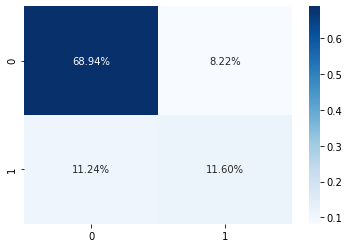

In [ ]:
Mostra_ConfusionMatrix()

### 8. _Fine tuning_ da Rede Neural

Para aumentar a acurácia da Rede Neural, sugiro aumentarmos o número de neurônios na _Hidden Layer_ e/ou aumentar o número de _Hidden Layers_.

No entanto, obtivemos uma acurácia razoável com a Rede Neural _baseline_. Portanto, deixo como exercício para os alunos o desafio de melhorar a acurácia desta Rede Neural.

### 9. Fazer Predições com a Rede Neural

[**Python**] - Comando:
* RN.predict_classes(X_treinamento);
* RN.predict_classes(X_teste).

In [287]:
y_test = RN.predict_classes(X_test)


In [288]:
df_submit = pd.concat([pd.DataFrame(X_test.index,columns=['id']),pd.DataFrame(y_test,columns=['target']).astype('boolean')],axis=1)



In [289]:
df_submit.head()

,id,target
0,3411,False
1,2177,False
2,8400,False
3,464,True
4,6672,True


In [290]:
df_submit['target'].value_counts()

False    663
True     337
Name: target, dtype: Int64

In [291]:
F = df_submit['target'].value_counts()[0]
T = df_submit['target'].value_counts()[1]

In [292]:
df_submit.to_csv(f'/PyLadies_NL_53_Test_{round(F1_Test,4)}_X_{round(F1_X,4)}_Trein_{round(F1_Trein,4)}_F{F}_T{T}.csv',index = False, sep = ',')

### 10. Conclusões

Desenvolvemos uma Rede Neural capaz de identificar Sexo (_Gender_) com acurácia= 0.9120.

### Salvar a Rede Neural

In [293]:
# Save the weights
RN.save('/RN_53.h5')